In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert path to mavenn beginning of path
import os
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn')


# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('mpsa')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 6,249
training + validation N: 24,234


,set,tot_ct,ex_ct,y,x
0,training,28,2,0.023406,GGAGUGAUG
1,training,315,7,-0.587914,AGUGUGCAA
2,validation,27,0,-0.438475,UAAGCUUUU
3,training,130,2,-0.631467,AUGGUCGGG
4,training,552,19,-0.433012,AGGGCAGGA
5,training,151,184,1.094011,AAGGUCCGC
6,training,88,4,-0.241737,CAGGCAAAC
7,training,105,5,-0.238471,GUGGCAAAU
8,validation,14,0,-0.167408,CAUGCAGCU
9,training,170,14,-0.048222,CAAGUCACU


In [3]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(L=L,
                     alphabet='rna',
                     gpmap_type='additive',
                     number_latent_nodes=3,
                     regression_type='Multi_Phi_GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)


In [4]:
model.get_nn().summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 37)]         0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 36)           0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
multi__additive_gp_map_layer (M (None, 3)            111         Sequence_only[0][0]              
__________________________________________________________________________________________________
multi_phi_global_epistasis_laye (None, 1)            251         multi__additive_gp_map_layer[0][0
______________________________________________________________________________________________

In [5]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df['y'],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

N = 24,234 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.37 sec.


In [6]:
# Fit model to data
model.fit(learning_rate=.001,
          epochs=1000,
          batch_size=200,
          early_stopping=True,
          early_stopping_patience=25,
          linear_initialization=False)

Epoch 1/1000
92/92 [==============================] - 3s 9ms/step - loss: 311.0696 - I_var: -0.6597 - val_loss: 279.7899 - val_I_var: -0.5516
Epoch 2/1000
92/92 [==============================] - 0s 3ms/step - loss: 274.7473 - I_var: -0.4914 - val_loss: 261.6087 - val_I_var: -0.4358
Epoch 3/1000
92/92 [==============================] - 0s 3ms/step - loss: 257.7226 - I_var: -0.3874 - val_loss: 245.7521 - val_I_var: -0.3352
Epoch 4/1000
92/92 [==============================] - 0s 3ms/step - loss: 242.8654 - I_var: -0.2945 - val_loss: 233.3064 - val_I_var: -0.2564
Epoch 5/1000
92/92 [==============================] - 0s 3ms/step - loss: 233.2955 - I_var: -0.2264 - val_loss: 223.6591 - val_I_var: -0.1970
Epoch 6/1000
92/92 [==============================] - 0s 3ms/step - loss: 221.4315 - I_var: -0.1824 - val_loss: 216.8424 - val_I_var: -0.1562
Epoch 7/1000
92/92 [==============================] - 0s 3ms/step - loss: 215.4980 - I_var: -0.1493 - val_loss: 211.2806 - val_I_var: -0.1237
Epoch 

92/92 [==============================] - 0s 5ms/step - loss: 173.3116 - I_var: 0.1392 - val_loss: 171.1217 - val_I_var: 0.1582
Epoch 60/1000
92/92 [==============================] - 0s 5ms/step - loss: 172.9370 - I_var: 0.1366 - val_loss: 171.1023 - val_I_var: 0.1582
Epoch 61/1000
92/92 [==============================] - 0s 3ms/step - loss: 173.0088 - I_var: 0.1410 - val_loss: 171.0961 - val_I_var: 0.1583
Epoch 62/1000
92/92 [==============================] - 0s 3ms/step - loss: 174.5777 - I_var: 0.1405 - val_loss: 171.0474 - val_I_var: 0.1588
Epoch 63/1000
92/92 [==============================] - 0s 3ms/step - loss: 174.4258 - I_var: 0.1409 - val_loss: 170.9760 - val_I_var: 0.1594
Epoch 64/1000
92/92 [==============================] - 0s 3ms/step - loss: 172.7566 - I_var: 0.1350 - val_loss: 170.9398 - val_I_var: 0.1595
Epoch 65/1000
92/92 [==============================] - 0s 3ms/step - loss: 171.5496 - I_var: 0.1312 - val_loss: 170.9331 - val_I_var: 0.1594
Epoch 66/1000
92/92 [======

92/92 [==============================] - 0s 3ms/step - loss: 172.5787 - I_var: 0.1539 - val_loss: 169.1215 - val_I_var: 0.1734
Epoch 118/1000
92/92 [==============================] - 0s 3ms/step - loss: 172.1616 - I_var: 0.1495 - val_loss: 169.2103 - val_I_var: 0.1728
Epoch 119/1000
92/92 [==============================] - 0s 3ms/step - loss: 173.4717 - I_var: 0.1527 - val_loss: 169.1311 - val_I_var: 0.1733
Epoch 120/1000
92/92 [==============================] - 0s 4ms/step - loss: 172.4316 - I_var: 0.1510 - val_loss: 169.0653 - val_I_var: 0.1740
Epoch 121/1000
92/92 [==============================] - 0s 3ms/step - loss: 172.1597 - I_var: 0.1565 - val_loss: 169.0275 - val_I_var: 0.1742
Epoch 122/1000
92/92 [==============================] - 0s 3ms/step - loss: 173.2112 - I_var: 0.1531 - val_loss: 168.9811 - val_I_var: 0.1744
Epoch 123/1000
92/92 [==============================] - 0s 3ms/step - loss: 170.8022 - I_var: 0.1542 - val_loss: 168.9133 - val_I_var: 0.1751
Epoch 124/1000
92/92 

Epoch 175/1000
92/92 [==============================] - 0s 3ms/step - loss: 170.1302 - I_var: 0.1723 - val_loss: 166.3377 - val_I_var: 0.1953
Epoch 176/1000
92/92 [==============================] - 0s 2ms/step - loss: 169.3382 - I_var: 0.1769 - val_loss: 166.1789 - val_I_var: 0.1965
Epoch 177/1000
92/92 [==============================] - 0s 2ms/step - loss: 170.4458 - I_var: 0.1766 - val_loss: 166.2399 - val_I_var: 0.1965
Epoch 178/1000
92/92 [==============================] - 0s 2ms/step - loss: 170.2607 - I_var: 0.1755 - val_loss: 165.9428 - val_I_var: 0.1984
Epoch 179/1000
92/92 [==============================] - 0s 2ms/step - loss: 169.0112 - I_var: 0.1771 - val_loss: 165.8419 - val_I_var: 0.1991
Epoch 180/1000
92/92 [==============================] - 0s 2ms/step - loss: 169.9691 - I_var: 0.1835 - val_loss: 165.6938 - val_I_var: 0.2001
Epoch 181/1000
92/92 [==============================] - 0s 2ms/step - loss: 167.9226 - I_var: 0.1747 - val_loss: 165.5375 - val_I_var: 0.2012
Epoch 

Epoch 233/1000
92/92 [==============================] - 0s 3ms/step - loss: 163.5204 - I_var: 0.2156 - val_loss: 160.6939 - val_I_var: 0.2354
Epoch 234/1000
92/92 [==============================] - 0s 3ms/step - loss: 165.3879 - I_var: 0.2229 - val_loss: 160.7825 - val_I_var: 0.2344
Epoch 235/1000
92/92 [==============================] - 0s 3ms/step - loss: 164.1775 - I_var: 0.2209 - val_loss: 160.5640 - val_I_var: 0.2362
Epoch 236/1000
92/92 [==============================] - 0s 3ms/step - loss: 163.0026 - I_var: 0.2222 - val_loss: 160.6922 - val_I_var: 0.2352
Epoch 237/1000
92/92 [==============================] - 0s 2ms/step - loss: 162.8688 - I_var: 0.2200 - val_loss: 160.5674 - val_I_var: 0.2362
Epoch 238/1000
92/92 [==============================] - 0s 3ms/step - loss: 162.8433 - I_var: 0.2228 - val_loss: 160.5302 - val_I_var: 0.2366
Epoch 239/1000
92/92 [==============================] - 0s 2ms/step - loss: 163.1470 - I_var: 0.2201 - val_loss: 160.6142 - val_I_var: 0.2361
Epoch 

In [7]:
# Save model
#model.save('mpsa_ge_additive')

In [8]:
# Load model
#model = mavenn.load('mpsa_ge_additive')

In [9]:
# Get x and y
x_test = test_df['x'].values
y_test = test_df['y'].values

On test data:


Text(0.5, 1.0, 'training hisotry')

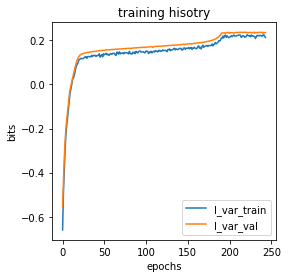

In [10]:
# Show training history
print('On test data:')

# Compute variational information
#I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
#print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
#I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
#print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [11]:
model.I_variational(x_test, y_test)

(0.21399246911904735, 0.028932906641218066)

Text(0, 0.5, 'y test')

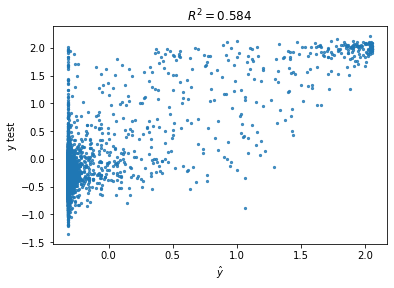

In [15]:
Rsq = str(np.corrcoef(model.x_to_yhat(x_test),y_test)[0][1]**2)
plt.scatter(model.x_to_yhat(x_test),y_test,s=5,alpha=0.8,c='C0')
plt.title(f'$R^2 =${Rsq[0:5]}')
plt.xlabel('$\hat{y}$')
plt.ylabel('y test')

In [14]:
model.get_nn().summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Sequence_labels_input (InputLay [(None, 37)]         0                                            
__________________________________________________________________________________________________
Sequence_only (Lambda)          (None, 36)           0           Sequence_labels_input[0][0]      
__________________________________________________________________________________________________
multi__additive_gp_map_layer (M (None, 3)            111         Sequence_only[0][0]              
__________________________________________________________________________________________________
multi_phi_global_epistasis_laye (None, 1)            251         multi__additive_gp_map_layer[0][0
______________________________________________________________________________________________